## Setup & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import os
import seaborn as sns
import joblib

## Load Data

In [2]:
iris = datasets.load_iris()

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

## Dataset Structure

In [4]:
iris_df.info(), iris.feature_names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


(None,
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

# The IRIS dataset

As displayed above the dataset is composed by 150 entries (from 0 to 149) each of them has 4 attributes.
Each attribute is a float64 dtype and there are no null-values in the dataset, so no need to handle null values. Ok for now.

### Feature names are:
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

## Descriptive Statistics

In [5]:
iris_df.head(), iris_df.tail()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8)

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Descriptive stats

Here nothing strange, all features are in the same scale. Looking at the std of all 4 features, I noticed that petal length has it of 1.77cm with a mean of 3.76, which may be indicative for class distinction for classification (or maybe not); so there are flowers very short and flowers that are very longin the dataset! Except from that I don't notice anything more.

In [7]:
iris.target.size

150

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Target Distribution

In [9]:
iris_df['family'] = iris.target

In [10]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),family
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
iris_df['family'].value_counts()

family
0    50
1    50
2    50
Name: count, dtype: int64

# Classes

All three classes are equally distributed 50 for setosa, 50 for versicolor and 50 for virginica. For further metrics there is no need to adjust this, no risk of over-fitting during model training and no bias due to unbalancing.

## Feature distributions

Now I try understand the distribution of each feature considering wheteher they are normal distributed or skewed, outliers, unimodal or multimodal

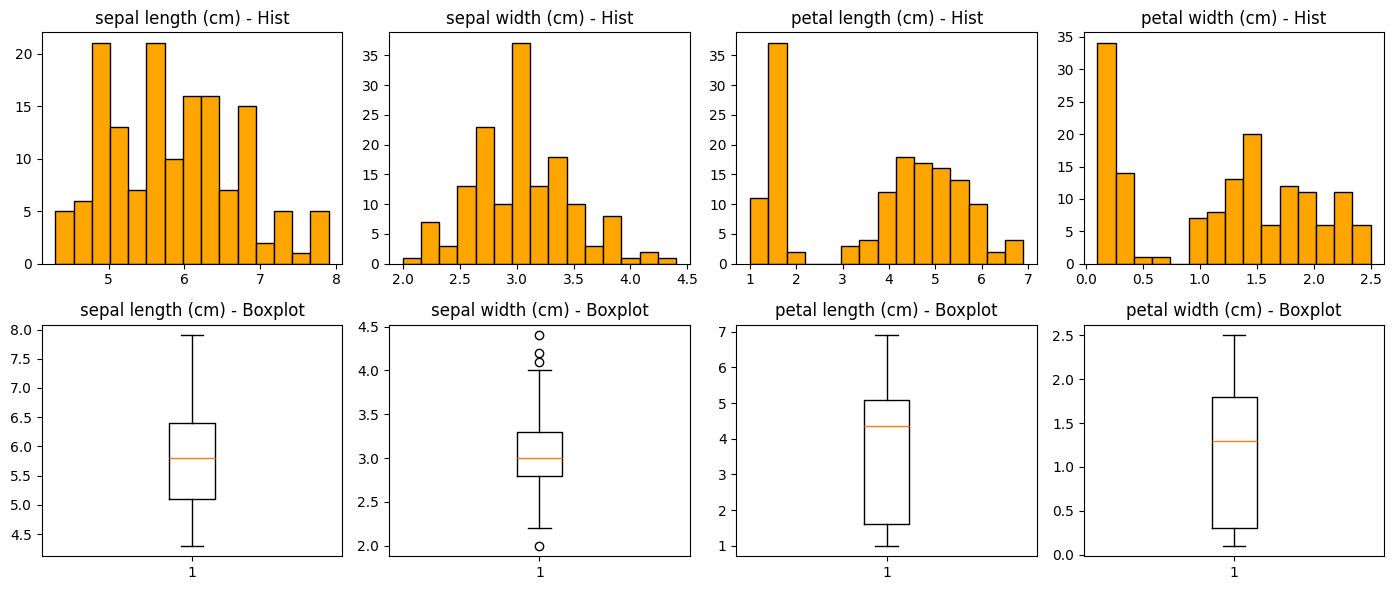

In [12]:
feature_columns = iris_df.columns[:-1]

ROWS, COLS = 2, 4
fig, axes = plt.subplots(ROWS,COLS,figsize=(14,6))

for i, col in enumerate(feature_columns):
    axes[0, i].hist(iris_df[col], bins=15, color='orange', edgecolor='black')
    axes[0, i].set_title(f'{col} - Hist')

    axes[1, i].boxplot(iris_df[col])
    axes[1, i].set_title(f'{col} - Boxplot')

plt.tight_layout()

os.makedirs('figures', exist_ok=True)
plt.savefig('figures/iris_features_distribution.png', format='png')

plt.show()

## Feature Distribution Notes

The histograms and boxplots above show several interesting distributions:

- **sepal length** → gaussian distribution, unimodal, no outliers
- **sepal width** → gaussian distribution, unimodal, 4 outliers (~4.2-4.4 and ~2.0); some flowers have unusually wide or narrow sepals
- **petal length** → bimodal (peaks ~1.5 and ~5), high variance, no outliers
- **petal width** → bimodal (peaks ~0.3 and ~1.7), high variance, no outliers

**Key insight**: The bimodal distributions of petal features suggest they naturally separate the data into groups - likely corresponding to different species. These features will probably be strong predictors for classification.

## Feauters and Target Correlation + Featrues themselves Correlation

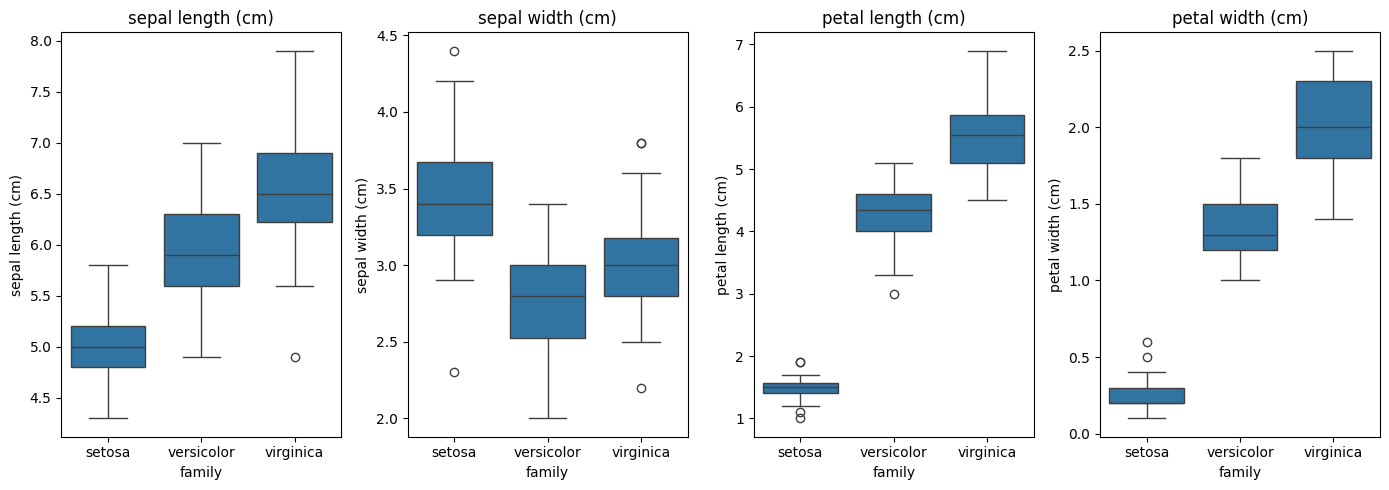

In [13]:
fig, axes = plt.subplots(1,4,figsize=(14,5))

for i, col in enumerate(feature_columns):
    sns.boxplot(x='family', y=col, data=iris_df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticks([0, 1, 2])  # aggiungi questa riga
    axes[i].set_xticklabels(['setosa', 'versicolor', 'virginica'])

plt.tight_layout()   
plt.savefig('figures/features_vs_target.png', format='png')
plt.show()

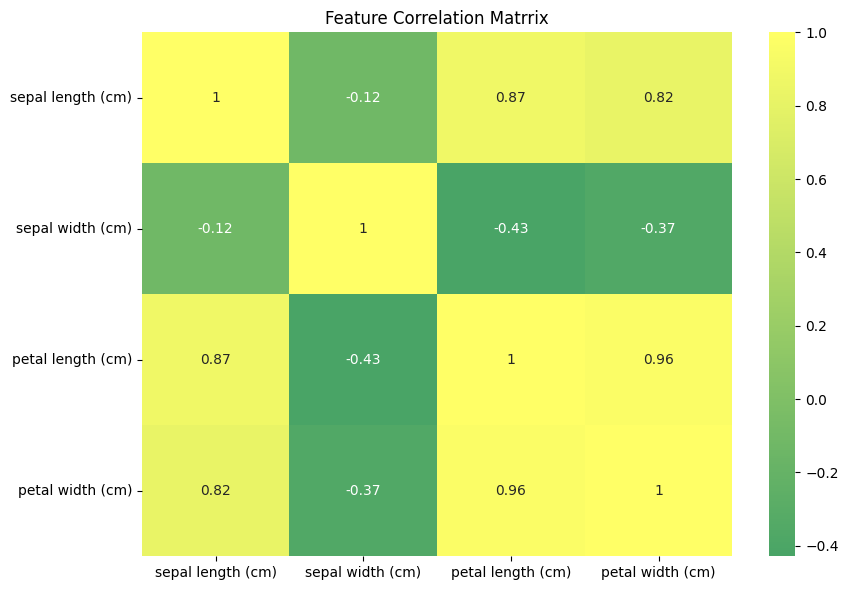

In [14]:
plt.figure(figsize=(9,6))
corr_matrix = iris_df[feature_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='summer', center=0)
plt.title('Feature Correlation Matrrix')
plt.tight_layout()
plt.savefig('figures/correlation_matrix.png', format='png')
plt.show()

## Step 1.5 - Feature vs Target Analysis

The boxplots reveal how each feature separates the three species:

- **sepal_length**: Progressive increase (setosa ~5cm → versicolor ~6cm → virginica ~6.5cm). Moderate overlap between classes.
- **sepal_width**: Setosa clearly distinct (~3.5cm). Versicolor and virginica overlap significantly (~2.8cm).
- **petal_length**: **Excellent separator**. Setosa completely isolated (1-2cm) with no overlap. Versicolor (4-5cm) and virginica (5-6cm) have slight overlap.
- **petal_width**: **Excellent separator**. Setosa completely isolated (0.1-0.5cm). Clear progression for other species.

**Key insight**: Petal features are the strongest predictors - they completely separate setosa from the other species.

---

## Step 1.6 - Feature Correlation Analysis

The correlation matrix reveals:

- **petal_length ↔ petal_width**: Very high correlation (0.96) → these features carry redundant information
- **petal_length ↔ sepal_length**: Strong correlation (0.87)
- **petal_width ↔ sepal_length**: Strong correlation (0.82)
- **sepal_width**: Weakly/negatively correlated with other features (-0.12 to -0.43)

**Implications for modeling**:
1. Petal features alone may be sufficient for high accuracy
2. High correlation between petal_length and petal_width means we could potentially drop one without losing much information
3. sepal_width behaves differently from other features - could provide complementary information

# Preprocessing

In [15]:
X, y = iris_df.drop('family', axis=1), iris_df['family']

In [16]:
X.shape, y.shape

((150, 4), (150,))

In [17]:
# Train/Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [19]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(family
 0    0.333333
 2    0.333333
 1    0.333333
 Name: proportion, dtype: float64,
 family
 0    0.333333
 2    0.333333
 1    0.333333
 Name: proportion, dtype: float64)

In [20]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled.mean(axis=0), X_train_scaled.std(axis=0)

(array([-1.20829273e-15, -2.03679666e-15,  4.99600361e-16,  1.67458640e-15]),
 array([1., 1., 1., 1.]))

## Phase 2 - Preprocessing

### Step 2.1 - Feature/Target Separation

Separated the dataset into features (X) and target (y). X contains the 4 measurements (sepal_length, sepal_width, petal_length, petal_width) with shape (150, 4). y contains the species labels with shape (150,).

### Step 2.2 - Train/Test Split

Split the data into training (80%) and test (20%) sets using stratified sampling to maintain class proportions. Both sets have exactly 33.3% for each species, ensuring the model is trained and evaluated on consistent distributions.

Training set: 120 samples (40 per class)
Test set: 30 samples (10 per class)

### Step 2.3 - Feature Scaling

Applied StandardScaler to normalize features to mean=0 and std=1. The scaler was fitted only on training data to prevent data leakage, then applied to both training and test sets.

Verification results:
- Mean of scaled training features: ~0 (values in order of 10^-15, effectively zero due to floating point precision)
- Std of scaled training features: [1., 1., 1., 1.]

The data is now ready for model training.

# Modeling

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
models = {
    'logistic_regression' : LogisticRegression(),
    'svm' : SVC(),
    'decision_tree' : DecisionTreeClassifier(),
    'random_forest' : RandomForestClassifier()
}

In [23]:
models_predictions = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    models_predictions[model_name] = predictions

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

models_report = {}
for model_name, predictions in models_predictions.items():
    
    report = classification_report(y_test, predictions)
    
    models_report[model_name] = report
    print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy        

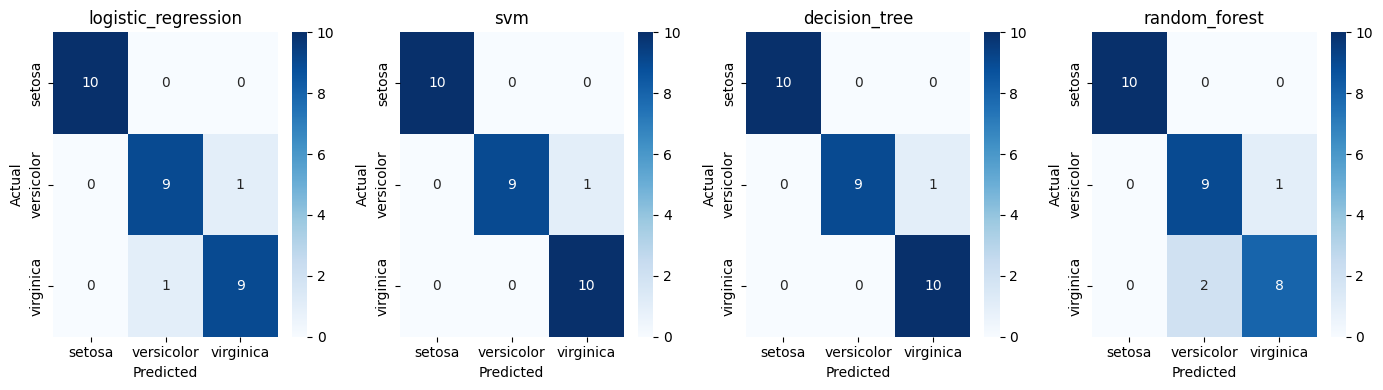

In [25]:
from sklearn.metrics import confusion_matrix

species_names = ['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,4))

for i, (model_name, predictions) in enumerate(models_predictions.items()):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_xticklabels(species_names)
    axes[i].set_yticklabels(species_names)
    axes[i].set_title(model_name)
    
plt.tight_layout()
plt.savefig('figures/confusion_matrices.png', format='png')
plt.show()
    

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models_fresh = {
    'logistic_regression': LogisticRegression(),
    'svm': SVC(),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier()
}

cv_results = {}
for model_name, model in models_fresh.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = {
        'scores': scores,
        'mean': scores.mean(),
        'std': scores.std()
    }
    print(f"{model_name}: mean={scores.mean():.4f}, std={scores.std():.4f}")

logistic_regression: mean=0.9583, std=0.0264
svm: mean=0.9667, std=0.0312
decision_tree: mean=0.9417, std=0.0204
random_forest: mean=0.9417, std=0.0204


## Results and Model Selection

Four different models have been tested for this multiclass classification task: Logistic Regression, SVM, Decision Tree and Random Forest.

In a first analysis on the test set, SVM and Decision Tree seemed the most promising since they had the highest accuracy (~96.7%). Previous assumptions about petal features proved correct: setosa is always correctly predicted by all models because its petal measurements are clearly separable from the other species, as discovered during EDA.

However, cross-validation with 5-folds revealed the full picture. SVM achieved the highest mean accuracy (96.7%) though with a standard deviation of 3.1%. Decision Tree, which appeared equally good on the single test set, dropped to 93.3% mean accuracy in cross-validation, demonstrating why evaluating on a single split can be misleading.

**Selected Model**: SVM (Support Vector Machine)

**Rationale**: Highest mean accuracy in cross-validation, and the slightly higher variance is acceptable given the small dataset size.

**Future Improvements**: Further work could include hyperparameter tuning with GridSearchCV to potentially improve performance, but for simplicity this is outside the scope of this project.

In [27]:
# Save results and test
os.makedirs('models', exist_ok=True)
joblib.dump(models['svm'], 'models/svm_v1.pkl')
joblib.dump(std_scaler, 'models/std_scaler_v1.pkl')

if not os.path.exists('models/svm_v1.pkl'):
    raise FileNotFoundError('Model file not created')
if not os.path.exists('models/std_scaler_v1.pkl'):
    raise FileNotFoundError('Scaler file not created')    

test_model = joblib.load('models/svm_v1.pkl')
test_scaler = joblib.load('models/std_scaler_v1.pkl')

sample = X_test.iloc[[0]]
sample_scaled = test_scaler.transform(sample)
prediction = test_model.predict(sample_scaled)

print(f"Sample features: {sample.values}")
print(f"Prediction: {prediction[0]} ({iris.target_names[prediction[0]]})")
print(f"Actual: {y_test.iloc[0]} ({iris.target_names[y_test.iloc[0]]})")

Sample features: [[4.4 3.  1.3 0.2]]
Prediction: 0 (setosa)
Actual: 0 (setosa)
